# hotAD
### A hot new package for Automatic Differentiation

### What is Automatic Differentiaton (AD)?

A set of techniques to efficiently evaluate the derivatives or gradients of any programmable function to machine precision.

### Why do we need Automatic Differentiaton (AD)?

Classical methods have limitations:

- Numerical Differentiation: suffers from truncation and roundoff error
- Symbolic Differentiation: Inefficiency as formula gets complicated and difficulty converting program into
  single formula

Both have problems calculating higher derivatives and partial derivatives.

### How does AD work?

Chain Rule Application:

    No matter how complicated a computer program is, it executes a sequence of elementary arithmetic operations (addition, subtraction, multiplication, division, etc) and elementary functions (Trigonometric functions, logarithms, exponential, power, etc). 
    
    Chain rule is applied repeatedly to achieve automatic calculation.
    
    Below is an example of symbolic representation:
    
$$\frac{dy}{dx} = \frac{dy}{dw_2}\frac{dw_2}{dw_1}\frac{dw_1}{dx} $$ 

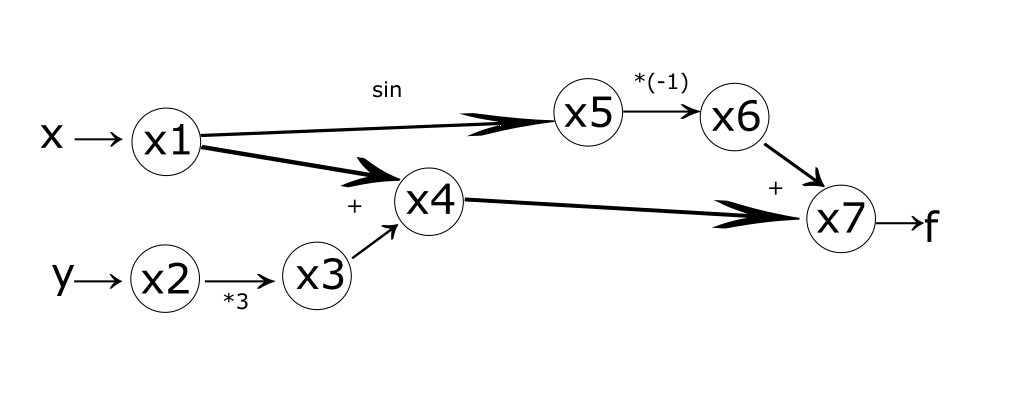

In [6]:
from IPython.display import Image
Image(r"images/eval_table.PNG")

### Package Structure


```
    hotAD\
        hotAD\
            __init__.py
            ADfun.py
            AutoDiffObject.py
            ElementaryFunctions.py
        setup.py
        README.md
        LICENSE
```

## Basic Features

In [7]:
from hotAD.AutoDiffObject import AutoDiff

x = AutoDiff(3, 'x', H=True)
y = AutoDiff(2, 'y', H=True)
f = x*x*y
print('Value:', f.val, '\n1st derivative:', f.der, '\n2nd derivative:', f.der2)

Value: 18 
1st derivative: {'x': 12, 'y': 9} 
2nd derivative: {'x': 4, 'xy': 6, 'yx': 6, 'y': 0}


In [27]:
from hotAD.ElementaryFunctions import ElementaryFunctions as ef

g = ef.sin(x)
print('Value:', g.val, '\n1st derivative:', g.der, '\n2nd derivative:', g.der2)

Value: -2.4492935982947064e-16 
1st derivative: {'x': 1.0} 
2nd derivative: {'x': 2.4492935982947064e-16}


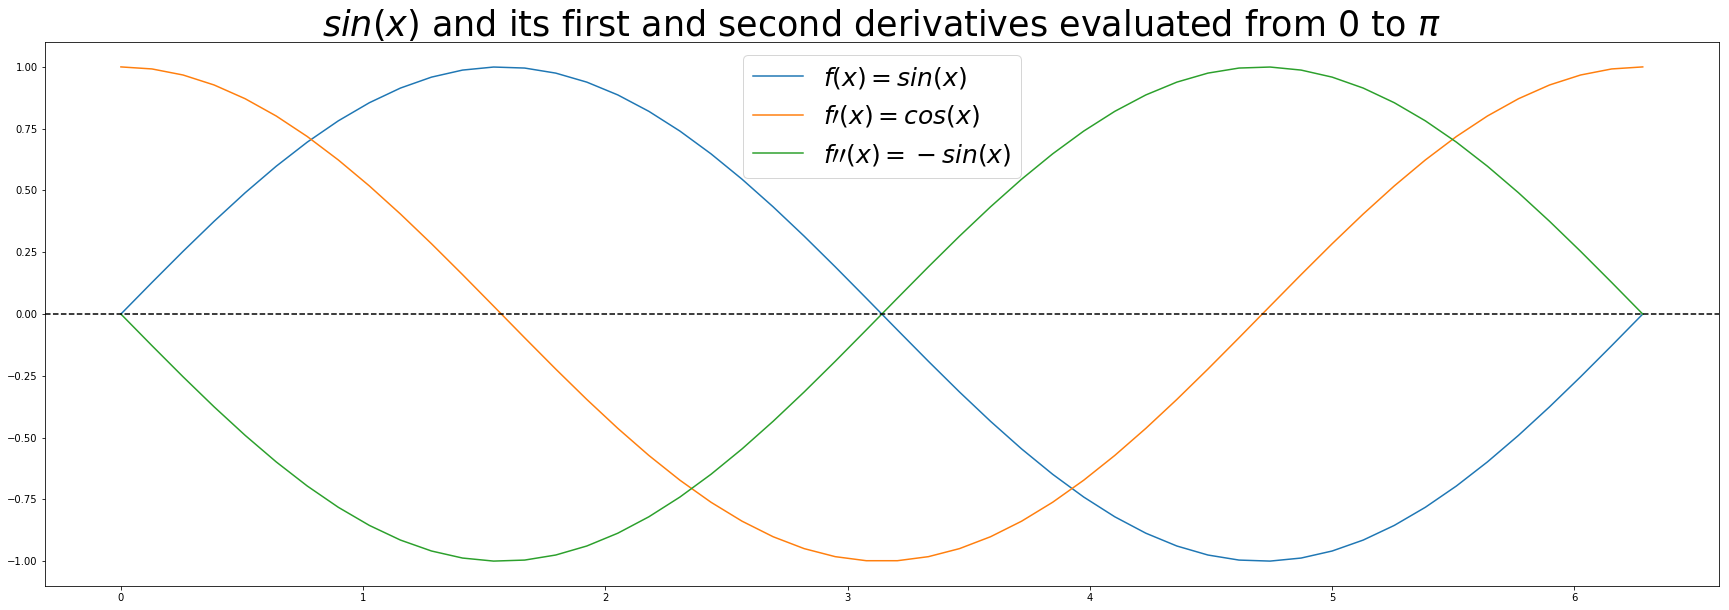

In [9]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

fun_vals = []
der_vals = []
der2_vals = []
for i in np.linspace(0, 2*np.pi):
    x = AutoDiff(i, "x", H=True)
    f = ef.sin(x)
    fun_vals.append(f.val)
    der_vals.append(f.der["x"])
    der2_vals.append(f.der2["x"])
    
plt.figure(figsize=(30,10))
plt.plot(np.linspace(0, 2*np.pi), fun_vals, label=r"$f(x) = sin(x)$")
plt.plot(np.linspace(0, 2*np.pi), der_vals, label=r"$f\prime(x) = cos(x)$")
plt.plot(np.linspace(0, 2*np.pi), der2_vals, label=r"$f\prime\prime(x) = -sin(x)$")
plt.axhline(0,color='black',linestyle='--')
plt.legend(fontsize=25)
plt.title(r'$sin(x)$ and its first and second derivatives evaluated from 0 to $\pi$', fontsize=35)
plt.show()

## Advanced features for implementing numerical methods:
### 1. Root Finding
### 2. Optimization

## Advanced features for implementing numerical methods:
###  <font color='green'> 1. Root Finding</font> 
### 2. Optimization

### Roots of a function

Suppose $F: \mathbb{R}^n \rightarrow \mathbb{R}^n$, where $n\ge 1$. 

$F$ is a vector of the form $F = (F_1, F_2, \dots, F_n)$

We seek a root $\mathbf{x} \in \mathbb{R}^n$ such that $F(\mathbf{x}) = \mathbf{0} $.   

### Numerical method to find roots: Newton's method

Suppose we have an initial guess for the root, $\mathbf{x}_0$. 

Then, given the Jacobian of $F$, $J_F$, we can perform linear approximation of the function around the initial guess and solve the linear system for $\Delta \mathbf{x}_0 $, as below:
$$  J_F (\mathbf{x}_0) \cdot \Delta x_0 = - F(\mathbf{x}_0)$$ 
  
Using the value for $\Delta \mathbf{x}_0 $ found, we can update the value of our guess for the root:
$$\mathbf{x}_{1} = \mathbf{x}_0 + \Delta \mathbf{x}_0 $$

Then, we can repeat the above process and iterate until a certain criteria is met (e.g. stop based on absolute step size, $|| \mathbf{x}_{k+1} - \mathbf{x}_k || < 10^{-8}$).


#### Example
Let $F: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ be given by: 

 \begin{align*}
    \mathbf{F}(x,y) &= \begin{bmatrix}%
    F_1(x,y)\\ 
    F_2(x,y)
    \end{bmatrix} \\
    & = \begin{bmatrix}%
    x^2 + 4 \cdot y + sin(x) \cdot tan(y) \\ 
    y + \frac{xy}{sin(x)}
    \end{bmatrix} \\
    \end{align*}

We want to find a root $(x_0, y_0)$ of this system of equations, such that $f_1(x_0, y_0) = 0$ and $f_2(x_0, y_0) = 0$.

Suppose our initial guess for a root is $(x_0, y_0)$ is $(1,2)$.  

In [10]:
from hotAD import ADfun as adf

In [24]:
def F(x):
    F_1 = x[0] * x[0] +4 * x[1] + ef.sin(x[0])* ef.tan(x[1])
    F_2 = x[1] + x[0]*x[1] / ef.sin(x[0])
    return [F_1, F_2]

In [33]:
find_root = adf.Newton(F, [1,2])

In [34]:
print('Root found:', find_root['x_min: '], '\nValue of F at root:', find_root['F(x_min): '],
      '\nNumber of iterations to converge:', find_root['number of iter: '])

Root found: [7.8604201e-09 0.0000000e+00] 
Value of F at root: [6.17862042e-17 0.00000000e+00] 
Number of iterations to converge: 85


## Advanced features for implementing numerical methods:
###   1. Root Finding

### <font color='green'>2. Optimization</font> 

The search for a point in the input space where a function reaches a maximum or minimum value. 

#### Example:
Let $G: \mathbb{R}^2 \rightarrow \mathbb{R}$ be given by: 

$$G(x, y) = 100(y - x^2)^2 + (1-x)^2$$

This is called the **Rosenbrock function**.

It is known that there exists a global minimum of $0$ at $(x, y) = (1, 1)$


In [ ]:
def G(x):
    return [100*ef.power((x[1]-x[0]*x[0]),2) + ef.power((1-x[0]),2)]

### Optimization
Three methods available in `hotAD`:
- Newton's method
- BFGS
- Gradient Descent

### i. Newton's method

- 2nd order method that uses the Jacobian and the Hessian to find the minimum of a function, $G$.
- Equivalent to applying Newton's root finding method to $G'$

CPU times: user 143 ms, sys: 107 ms, total: 251 ms
Wall time: 594 ms


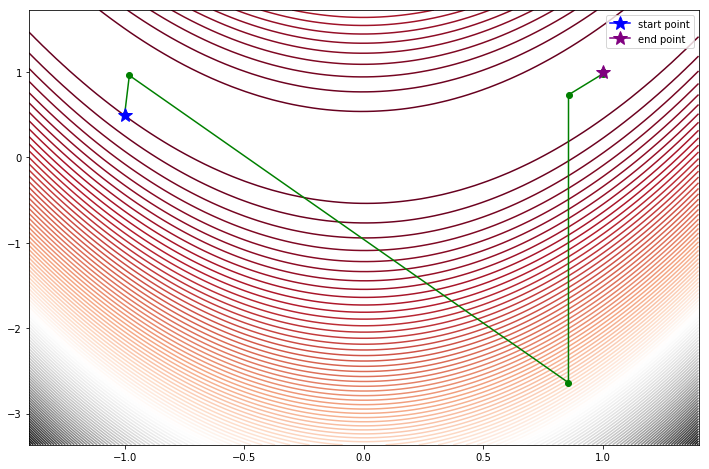

In [39]:
import time
%time Newton_result = adf.Mini(G, [-1, 0.5], plot = True, method = 'newton')

In [38]:
Newton_result

{'x_min': array([1., 1.]),
 'min F(x)': array([0.]),
 'Jacobian F(x_min)': array([0., 0.]),
 'Hessian F(x_min)': array([[ 802., -400.],
        [-400.,  200.]]),
 'number of iter': 7,
 'trace': array([[-1.        ,  0.5       ],
        [-0.98019802,  0.96039604],
        [ 0.85599869, -2.6388846 ],
        [ 0.85621192,  0.73309881],
        [ 0.99999869,  0.97932275],
        [ 0.99999895,  0.99999789],
        [ 1.        ,  1.        ],
        [ 1.        ,  1.        ]])}

### ii. Quasi-Newton Method: BFGS

**How does BFGS work?**
-  Works the same as Newton's Method
-  Hessian matrix is approximated instead using function gradient information in each step

**Advantage:**
-  Avoid expensive exact calculation of Hessian matrix


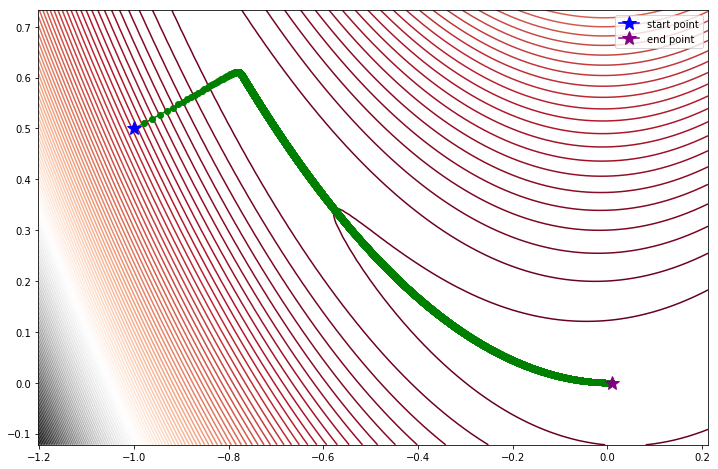

In [40]:
gd_result = adf.Mini(G, [-1, 0.5], method = "gradient-descent", plot = True)

## III. Conclusion

### Future Work:

- Expand optimization algorithms:
    - Steepest Descent
    - Simulated Annealing
    
- Support AD reverse mode
- Develop backpropagation with reverse mode